In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [24]:
model = load_model('model/best_model.epoch18-accuracy0.81188.hdf5')
titles_str = ['bumper_dent','bumper_scratch','door_dent','door_scratch',
              'glass_shatter','head_lamp','tail_lamp','unknown']
test_image_dir = 'test_images'

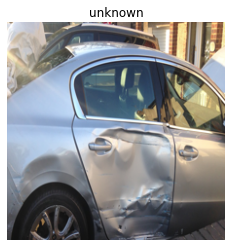

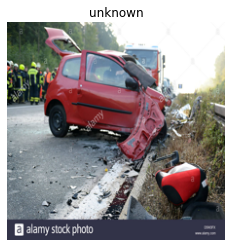

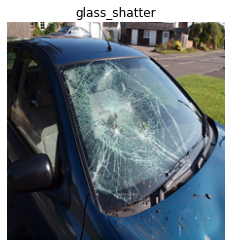

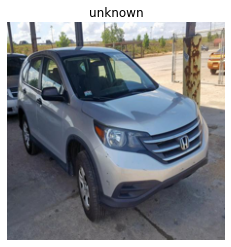

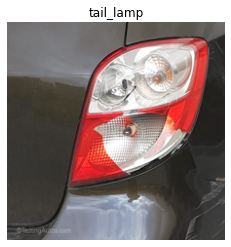

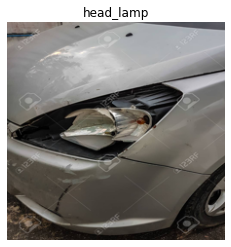

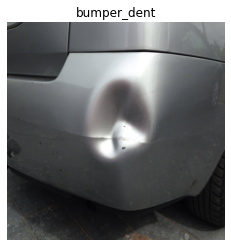

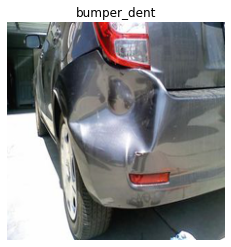

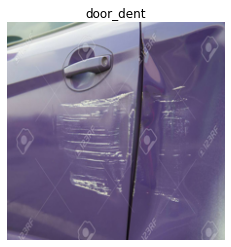

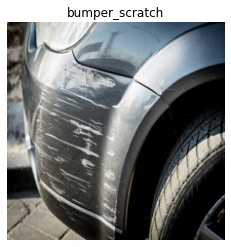

In [25]:
for pic in os.listdir(test_image_dir):
    with Image.open(test_image_dir+'/'+pic) as im:
        im = im.resize((224, 224))
        im = np.array(im)
    plt.imshow(im) # display the image

    im = preprocess_input(im)
    im = np.expand_dims(im, axis=0) # making the image into a batch of size 1

    prediction = tf.math.argmax(tf.nn.softmax(model.predict(im)), axis=1).numpy()
    title = titles_str[int(prediction)]

    plt.title(title)
    plt.axis("off")
    plt.show()
    print()